# YAHOO FINANCE STOCK ANALYSIS ` BIOGEN INC`


## ML2 - XGBoost and Stacking of XGBoost - GRU& LSTM
### Temmuz Yavuzer 44130

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Reading Data

Data is taken from Yahoo Finance webpage https://finance.yahoo.com/quote/BIIB/history?p=BIIB
We are going to analyze the last 10 year of the company and try to predict the future of the stock. So that we can create a strategy to trade this .

The main reason for me too choose this data is, I already had invested in it. I want to have a more deep knowledge about it. This will be a great opinion for me to see the trend on the stock

In [2]:
biib_data = pd.read_csv("BIIB.csv")

In [3]:
biib_data.shape

(1510, 7)

In [4]:
biib_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [5]:
biib_data.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
8,2017-01-24,275.739990,278.399994,271.470001,273.820007,273.820007,1975200
1179,2021-09-17,300.850006,300.850006,296.559998,300.190002,300.190002,1680000
1455,2022-10-21,264.299988,268.589996,261.920013,267.619995,267.619995,1575200
717,2019-11-15,278.250000,283.950012,277.109985,282.269989,282.269989,1922200
215,2017-11-16,310.720001,314.619995,309.679993,313.980011,313.980011,731700
875,2020-07-06,268.040009,270.709991,267.130005,269.799988,269.799988,859400
902,2020-08-12,290.690002,296.269989,290.690002,293.220001,293.220001,1016400
375,2018-07-10,347.540009,347.899994,339.149994,344.820007,344.820007,3425600
1449,2022-10-13,251.869995,271.989990,251.770004,269.940002,269.940002,3279200
784,2020-02-25,327.200012,330.609985,322.700012,324.109985,324.109985,1831100


In [6]:
biib_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,278.686278,282.490172,275.019232,278.655271,278.655271,1.552901e+06
std,42.399453,43.276185,41.742172,42.507419,42.507419,1.386287e+06
min,190.559998,193.889999,187.160004,187.539993,187.539993,6.000000e+02
25%,245.145004,248.042496,242.404999,244.149994,244.149994,9.743750e+05
50%,280.020005,283.460006,276.190002,279.634995,279.634995,1.276200e+06
75%,309.030006,314.537506,304.902512,309.512497,309.512497,1.684950e+06
max,423.329987,468.549988,404.250000,414.709991,414.709991,2.184310e+07


# Data Analysis

In [7]:
biib_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
biib_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

As we can see our data is clean, we dont have any missing or null values. So we dont need to so much to prepare our data for the analysis.

Let's check the graphs of the data to understand more deeply.

In [9]:
df = biib_data[["Date","Open"]]

<AxesSubplot:xlabel='Date'>

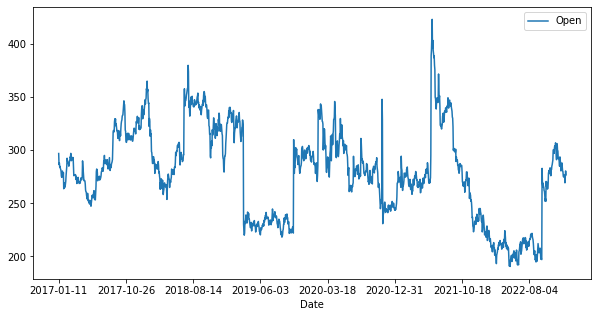

In [10]:
df.plot(kind='line',y='Open',x='Date',figsize=(10,5))

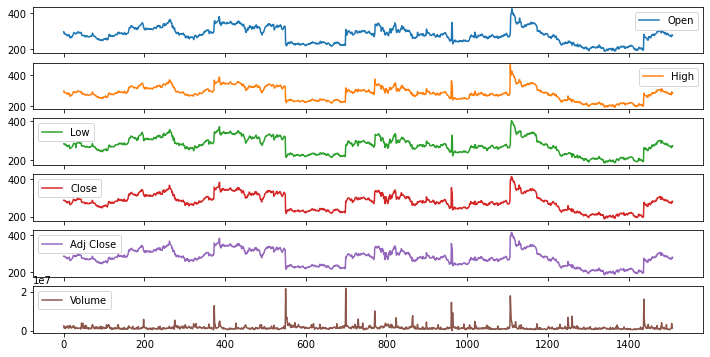

In [11]:
biib_data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

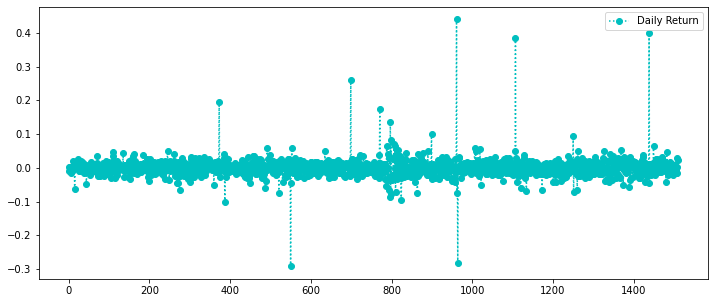

In [12]:
biib_data['Daily Return'] = biib_data['Close'].pct_change()
# plot the daily return percentage
biib_data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o', color='c')
plt.show()

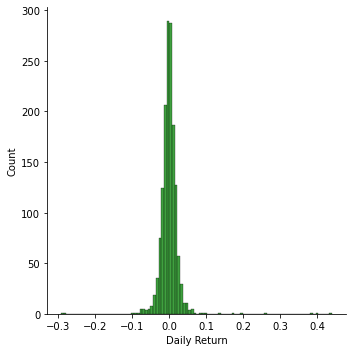

In [13]:
sns.displot(biib_data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

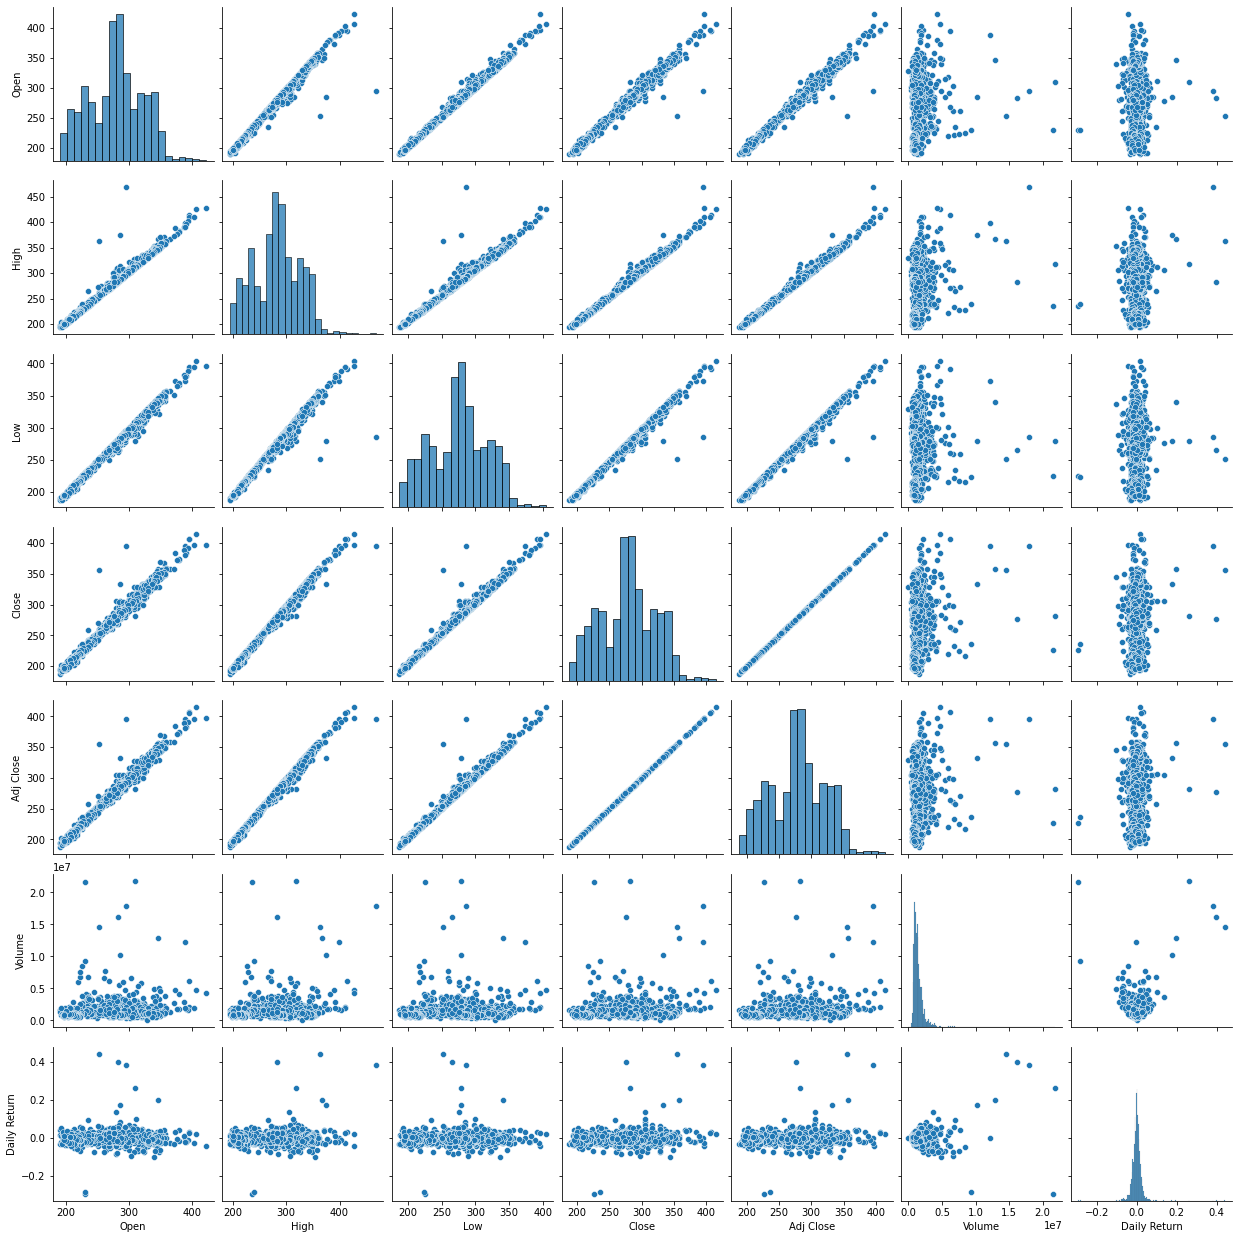

In [14]:
sns.pairplot(biib_data)

<AxesSubplot:xlabel='High', ylabel='Volume'>

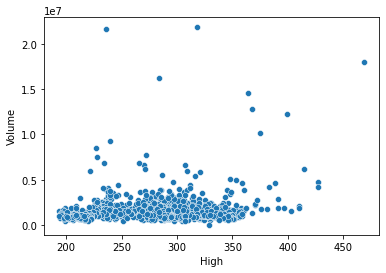

In [15]:
sns.scatterplot(x='High', y = 'Volume', data=biib_data)

C:\Users\tyavuzer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tyavuzer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


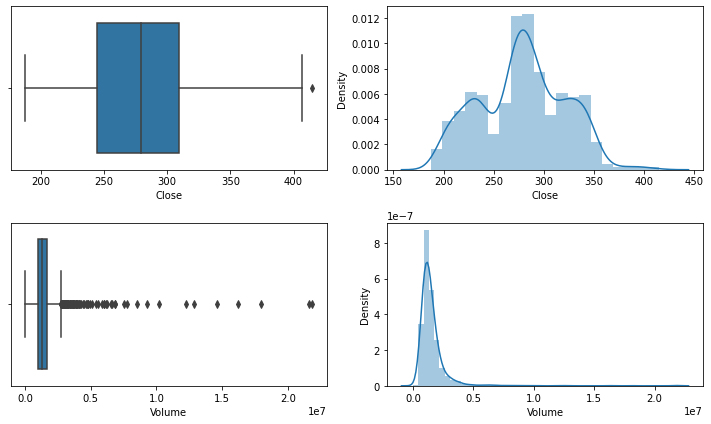

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (10,6))
sns.boxplot(x= biib_data["Close"], ax = ax[0,0])
sns.distplot(biib_data['Close'], ax = ax[0,1])
sns.boxplot(x= biib_data["Volume"], ax = ax[1,0])
sns.distplot(biib_data['Volume'], ax = ax[1,1])
plt.tight_layout()

<AxesSubplot:>

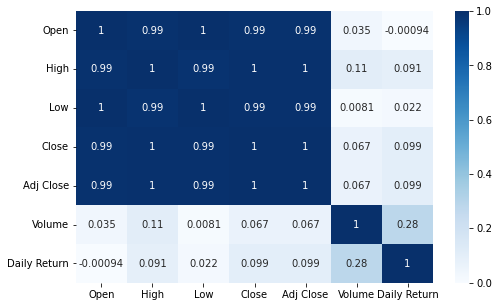

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(biib_data.corr(),cmap=plt.cm.Blues,annot=True)

# Data Preparation - Training and Testing

Define features,labels for training and for test set



In [18]:
train_data = biib_data.sample(frac=0.8, random_state=1)
test_data = biib_data.drop(train_data.index)

In [19]:
X_train = train_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y_train = train_data['Close']

X_test = test_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y_test = test_data['Close']

In [20]:
y_train

572     230.210007
983     243.679993
782     336.709991
536     334.100006
1144    329.170013
           ...    
70      276.859985
610     231.779999
1174    299.809998
1450    264.630005
1441    264.299988
Name: Close, Length: 1208, dtype: float64

# XGBoost
Set up XGBoost model and train the model


In [21]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Making predictions on test set and calculating the Mean Squared Error


In [22]:
predictions = xgb_model.predict(X_test)

In [23]:
xgb_mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error: ", xgb_mse)

Mean Squared Error:  0.35722698810935477


Let's make a prediction for the stock's closing price in five days


In [24]:
test_input = biib_data.tail(5)[['Open', 'High', 'Low', 'Close', 'Volume']]
pred = xgb_model.predict(test_input)

In [25]:
pred

array([270.4943 , 271.61444, 279.23105, 274.7049 , 281.7686 ],
      dtype=float32)

Lets make a prediction for the stock's closing price all days this time and create a graph to compare the results what we had with XGBoost

In [26]:
test_input = biib_data[['Open', 'High', 'Low', 'Close', 'Volume']]
pred = xgb_model.predict(test_input)

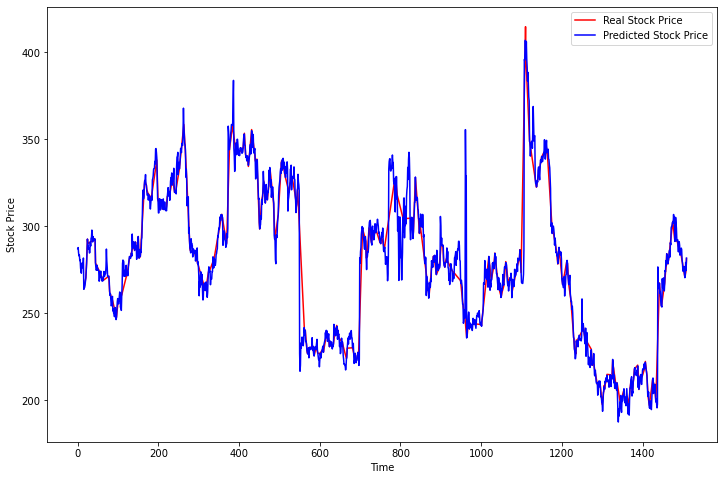

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Neural Network - GRU & LSTM

The result that we got from the XGBoost is quite respectable, however I want to build more complex model to predict it. So first, I will try to find the best paramaters for model of GRU&LSTM.

Paramaters that I would like to optimize;
  - Number of GRU Units
  - Number LSTM Units
  - Dropout
  - Dense
  - Epochs
  - Batch Size
  
After, that I will compare its with XGBoost and Normal Neural Network model that I created with out an hyperparamater optimization

In [28]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, LSTM, Dropout,Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [29]:
df = pd.read_csv("BIIB.csv")

X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Close']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10)

# Creating function to define the model

In [32]:
def create_model(gru_units=10, num_units=20, dropout=0.3, dense=1):
    model = Sequential()
    model.add(GRU(gru_units, input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(num_units))
    model.add(Dense(dense))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))
    return model

## Hyperparamater Tuning

In [33]:
created_model = KerasRegressor(build_fn=create_model)

param_grid = {'gru_units': [10,20,40,60,80]
              ,'num_units': [25,50,75,100,200]
              ,'dropout': [0.1,0.3, 0.5, 0.7,0.9]
              ,'dense': [1] }

C:\Users\tyavuzer\AppData\Local\Temp/ipykernel_8604/3649791952.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  created_model = KerasRegressor(build_fn=create_model)


I preferred to use RandomizedSearch because when I was trying to optimize it with GridSearch, execution time increased exponentially. Having RandomizedSearch decreased the execution time however the results that I was getting less stable.

In [60]:
# Perform a grid search to find the best parameters
#grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid = RandomizedSearchCV(estimator=created_model, param_distributions=param_grid)
grid_result = grid.fit(X_train, y_train, callbacks=[es])

38/38 [==============================] - 3s 31ms/step - loss: 23789.1035


Lets create the model with the paramater that we got from the RandomSearch

In [61]:
print("Best params for the GRU-LSTM: %s" % (grid_result.best_params_))

Best params for the GRU-LSTM: {'num_units': 200, 'gru_units': 20, 'dropout': 0.1, 'dense': 1}


In [62]:
grid_model = create_model(gru_units=grid_result.best_params_['gru_units'],
                          num_units=grid_result.best_params_['num_units'], 
                          dropout=grid_result.best_params_['dropout'],
                          dense=grid_result.best_params_['dense']
                         )

We are able to create a model with number of GRU units, LSTM units, Dropout and Dense number. However we haven't optimized it for the Number of Epochs and Batch Size.

So that, I had created a for loop to find the best Number of Epochs and Batch Size for the created model. The reason for me to do it with this way is; I didnt want to wait for a long time because if we put it into the RandomSearch, then we would increase the time complexity exponentialy. 

### Finding best parameters for Batch size and number of Epochs


In [68]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20)
batch_size = [32, 64]
epochs = [256, 512]

best_batch_size = 1
best_loss = 1000000
best_epochs= 1

In [69]:
for bs in batch_size:
    for e in epochs:
        grid_model.fit(X_train, y_train, batch_size=bs, epochs=e, verbose=0, validation_data=(X_test, y_test), callbacks=[es])
        loss = grid_model.evaluate(X_test, y_test)
        if loss < best_loss:
            best_batch_size = bs
            best_epochs = e
            best_loss = loss

Epoch 31: early stopping
10/10 [==============================] - 0s 6ms/step - loss: 1678.4133
Epoch 89: early stopping
10/10 [==============================] - 0s 6ms/step - loss: 30.6581
Epoch 29: early stopping
10/10 [==============================] - 0s 8ms/step - loss: 17.1351
Epoch 110: early stopping
10/10 [==============================] - 0s 6ms/step - loss: 20.2689


In [90]:
print("Best batch size: ", best_batch_size)
print("Best number of epoch: ", best_epochs)

Best batch size:  64
Best number of epoch:  256


In [71]:
grid_model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epochs,
               verbose=1, 
               validation_data=(X_test, y_test))

y_pred_final = grid_model.predict(X_test)

Epoch 1/256
19/19 [==============================] - 1s 39ms/step - loss: 20.9097 - val_loss: 15.7254
Epoch 2/256
19/19 [==============================] - 1s 38ms/step - loss: 23.2294 - val_loss: 17.6410
Epoch 3/256
19/19 [==============================] - 1s 37ms/step - loss: 24.4782 - val_loss: 14.3811
Epoch 4/256
19/19 [==============================] - 1s 38ms/step - loss: 24.2538 - val_loss: 23.8473
Epoch 5/256
19/19 [==============================] - 1s 38ms/step - loss: 24.0705 - val_loss: 15.1153
Epoch 6/256
19/19 [==============================] - 1s 39ms/step - loss: 24.3787 - val_loss: 14.3327
Epoch 7/256
19/19 [==============================] - 1s 37ms/step - loss: 22.7173 - val_loss: 13.9106
Epoch 8/256
19/19 [==============================] - 1s 38ms/step - loss: 22.1945 - val_loss: 17.8564
Epoch 9/256
19/19 [==============================] - 1s 38ms/step - loss: 25.4333 - val_loss: 17.7236
Epoch 10/256
19/19 [==============================] - 1s 38ms/step - loss: 22.5280

19/19 [==============================] - 1s 38ms/step - loss: 45.6503 - val_loss: 19.0161
Epoch 160/256
19/19 [==============================] - 1s 39ms/step - loss: 29.0667 - val_loss: 17.8915
Epoch 161/256
19/19 [==============================] - 1s 38ms/step - loss: 26.4107 - val_loss: 23.1328
Epoch 162/256
19/19 [==============================] - 1s 37ms/step - loss: 26.7568 - val_loss: 15.5890
Epoch 163/256
19/19 [==============================] - 1s 38ms/step - loss: 23.1126 - val_loss: 15.2503
Epoch 164/256
19/19 [==============================] - 1s 38ms/step - loss: 23.0850 - val_loss: 18.1720
Epoch 165/256
19/19 [==============================] - 1s 39ms/step - loss: 24.4857 - val_loss: 13.5963
Epoch 166/256
19/19 [==============================] - 1s 38ms/step - loss: 27.8612 - val_loss: 18.5453
Epoch 167/256
19/19 [==============================] - 1s 38ms/step - loss: 28.8198 - val_loss: 32.7786
Epoch 168/256
19/19 [==============================] - 1s 38ms/step - loss: 39

Epoch 238/256
19/19 [==============================] - 1s 38ms/step - loss: 25.0492 - val_loss: 19.4585
Epoch 239/256
19/19 [==============================] - 1s 38ms/step - loss: 26.8444 - val_loss: 18.4049
Epoch 240/256
19/19 [==============================] - 1s 38ms/step - loss: 27.4296 - val_loss: 15.4745
Epoch 241/256
19/19 [==============================] - 1s 37ms/step - loss: 22.0914 - val_loss: 12.4526
Epoch 242/256
19/19 [==============================] - 1s 38ms/step - loss: 24.2840 - val_loss: 20.0537
Epoch 243/256
19/19 [==============================] - 1s 39ms/step - loss: 30.5867 - val_loss: 21.4458
Epoch 244/256
19/19 [==============================] - 1s 38ms/step - loss: 64.1978 - val_loss: 45.2623
Epoch 245/256
19/19 [==============================] - 1s 37ms/step - loss: 69.3549 - val_loss: 34.0322
Epoch 246/256
19/19 [==============================] - 1s 39ms/step - loss: 51.2036 - val_loss: 27.5340
Epoch 247/256
19/19 [==============================] - 1s 40ms/s

In [72]:
grid_mse = mean_squared_error(y_test, y_pred_final)
print("Mean Squared Error:", grid_mse)

Mean Squared Error: 30.885648508838738


In [73]:
grid_model.summary()

Model: "sequential_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_155 (GRU)               (None, 5, 20)             1380      
                                                                 
 dropout_155 (Dropout)       (None, 5, 20)             0         
                                                                 
 lstm_155 (LSTM)             (None, 200)               176800    
                                                                 
 dense_155 (Dense)           (None, 1)                 201       
                                                                 
Total params: 178,381
Trainable params: 178,381
Non-trainable params: 0
_________________________________________________________________


## Combining Two Model
### XGBOOST and GRU&LSTM

In [78]:
from sklearn.pipeline import Pipeline
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor


In [79]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.05)

In [80]:
def create_LSTM():
    normal_model = Sequential()
    normal_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1,)))
    normal_model.add(LSTM(units=50))
    normal_model.add(Dense(1))
    normal_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))
    return normal_model

In [81]:
LSTM_pipeline = Pipeline([('lstm', KerasRegressor(build_fn=create_LSTM, epochs=100, batch_size=10, verbose=0))])

C:\Users\tyavuzer\AppData\Local\Temp/ipykernel_8604/2625982252.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  LSTM_pipeline = Pipeline([('lstm', KerasRegressor(build_fn=create_LSTM, epochs=100, batch_size=10, verbose=0))])


In [82]:
stack = StackingCVRegressor(regressors=(xgb, LSTM_pipeline), meta_regressor=xgb, cv=5)


In [83]:
stack.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate...
                                             learning_rate=0.05, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             predictor=None, random_state=None, ...),
                                Pipeline(steps=[('lstm',
                                                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x0000014A7F49E580>)])))

In [84]:
y_pred = stack.predict(X_test)

In [85]:
stack_mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", stack_mse)

Mean Squared Error: 3.5250695453316765


In [86]:
#!pip install prettytable
from prettytable import PrettyTable

x = PrettyTable()
print('\n')
print("Comparison of all models")
x.field_names = ["Model", "Mean Squared Error"]

x.add_row(["XGBoost", round(xgb_mse,2)])
x.add_row(["Optimized GRU&LSTU(5 min trained)", round(grid_mse,2)])
x.add_row(["Stack GRU&LSTU and XGBoost", round(stack_mse,2)])


print(x)
print('\n')



Comparison of all models
+-----------------------------------+--------------------+
|               Model               | Mean Squared Error |
+-----------------------------------+--------------------+
|              XGBoost              |        0.36        |
| Optimized GRU&LSTU(5 min trained) |       30.89        |
|     Stack GRU&LSTU and XGBoost    |        3.53        |
+-----------------------------------+--------------------+


